# Laboratorio 2 - Inteligencia Artificial 
Fabiola Contreras -
Diego Duarte -
Maria Jose Villafuerte

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pandas as pd
from sklearn.decomposition import PCA

### 1. Simular lanzamientos de una moneda en la computadora 

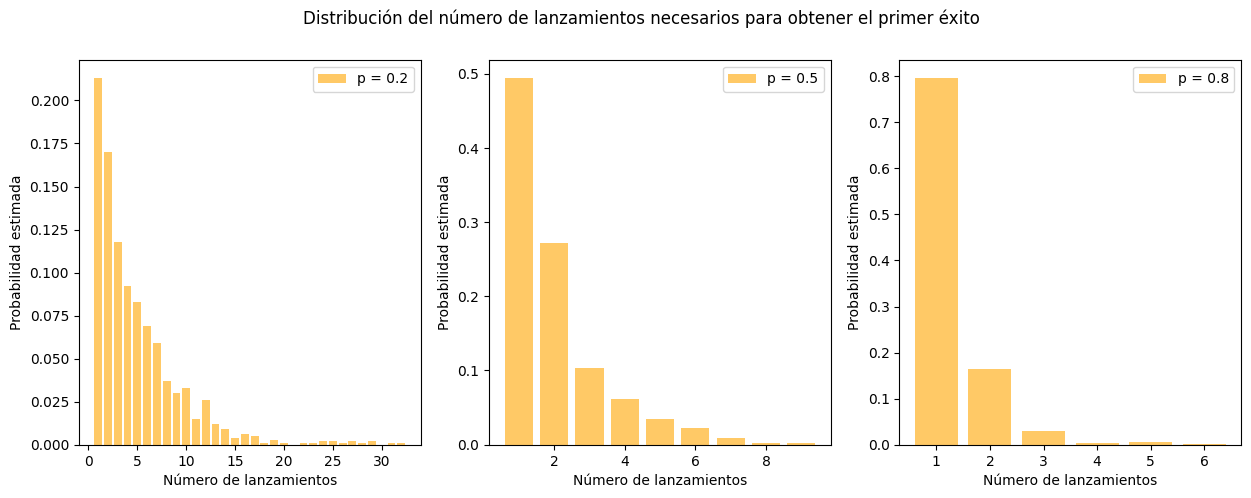

In [3]:
#Simulación de lanzamiento de moneda
def throw_coin(p):
    #Esta función regresa una lista de intentos necesarios para cada simulacion. 
    return np.random.geometric(p, size=1000)

# Graficación de la funcion densidad 
def plot_density(data, p, ax):
    #Regresa la cantidad de los valores unicos que se repitan 
    values, counts = np.unique(data, return_counts=True)
    ax.bar(values, counts / counts.sum(), alpha=0.6, color='orange', label=f"p = {p}")
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad estimada")
    ax.legend()

# Valores de probabilidad de exito a probar
p_values = [0.2, 0.5, 0.8]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Simulación con diferentes probabilidades
for p, ax in zip(p_values, axes):
    data = throw_coin(p)
    plot_density(data, p, ax)

plt.suptitle("Distribución del número de lanzamientos necesarios para obtener el primer éxito")
plt.show()    

### 2. Comparación de dos muestras


 Geom(p)
KS-statistic: 0.11, p-value: 1.0915917613597424e-05
KstestResult(statistic=np.float64(0.11), pvalue=np.float64(1.0915917613597424e-05), statistic_location=np.int32(1), statistic_sign=np.int8(1))


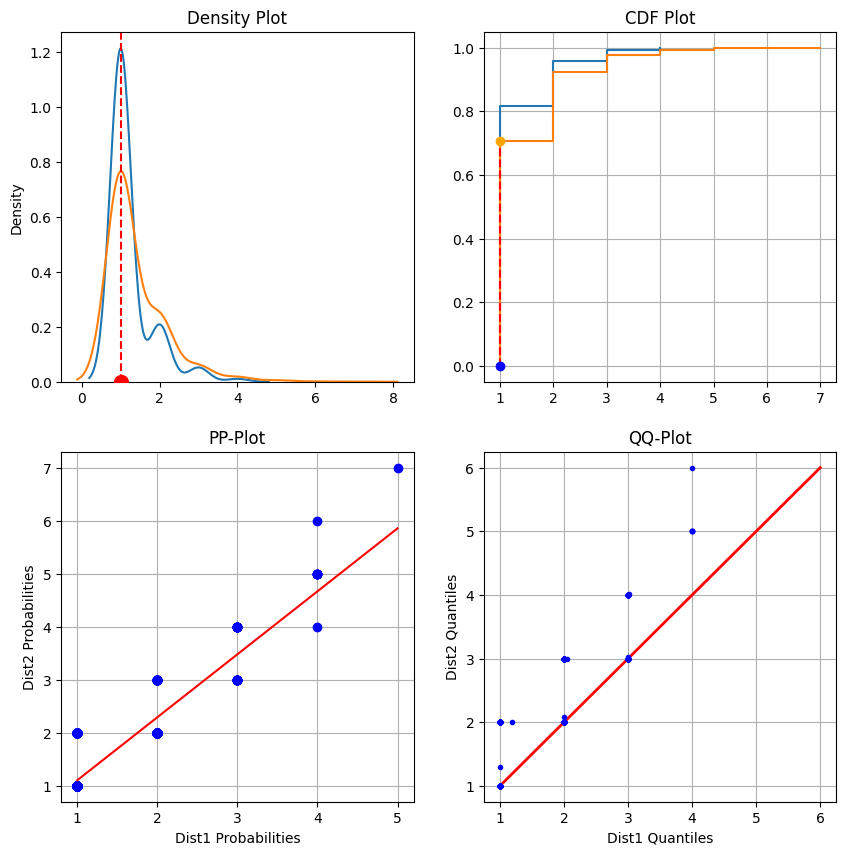


 Geom(q)
KS-statistic: 0.241, p-value: 6.914010091642317e-26
KstestResult(statistic=np.float64(0.241), pvalue=np.float64(6.914010091642317e-26), statistic_location=np.int32(1), statistic_sign=np.int8(1))


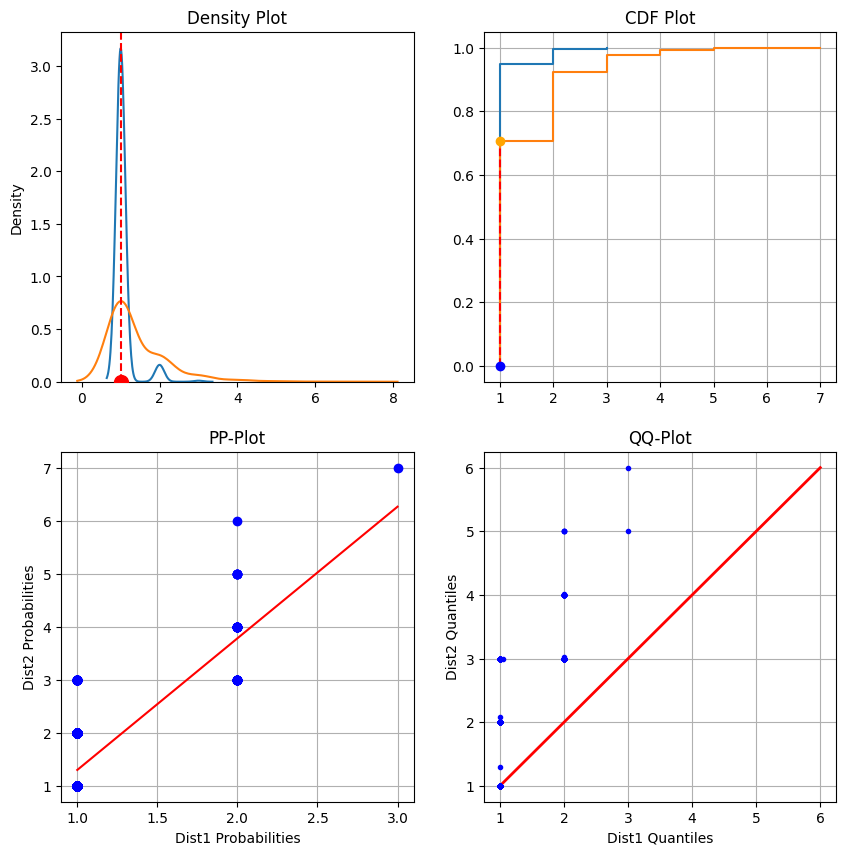

In [23]:
# Función para calcular la ECDF (Función de distribución empírica)
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def compare_samples(data1, data2, p1):
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)

    plt.figure(figsize=(10, 10))

    # Distancia KS
    ks_statistic, p_value = sps.ks_2samp(data1, data2, alternative='two-sided')
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")

    # Encontrar el punto donde la diferencia es máxima
    # Interpolamos y2 a la misma longitud de y1 (para comparar correctamente)
    from scipy.interpolate import interp1d
    interp_y2 = interp1d(x2, y2, kind='previous', bounds_error=False, fill_value=(0, 1))
    y2_interp = interp_y2(x1)  # Obtener valores de y2 en los mismos puntos que x1

    # Determinar el índice donde ocurre la distancia máxima
    idx = np.argmax(np.abs(y1 - y2_interp))
    ks_x = x1[idx]  # Punto en X donde ocurre la distancia KS
    ks_y1 = y1[idx]  # Valor de ECDF1 en ese punto
    ks_y2 = y2_interp[idx]  # Valor de ECDF2 en ese punto

    # a) Las funciones de densidad f1 y f2.
    plt.subplot(2,2,1)
    sns.kdeplot(data1, bw_method=0.5, label='dist1')
    sns.kdeplot(data2, bw_method=0.5, label='dist2')
    plt.title('Density Plot')

    # Marcar el punto KS en la densidad
    plt.axvline(ks_x, color='red', linestyle='dashed', label=f'KS @ x={ks_x}')
    plt.scatter([ks_x], [0], color='red', zorder=3, label="KS Point", marker="o", s=100)

    # b) Las funciones de distribución F1 y F2.
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')

    # Marcar el punto donde ocurre la distancia KS
    plt.vlines(ks_x, ks_y1, ks_y2, colors='r', linestyle='dashed', label=f'KS = {ks_statistic:.3f}')
    plt.scatter([ks_x], [ks_y1], color='blue', zorder=3)  # Punto en la ECDF1
    plt.scatter([ks_x], [ks_y2], color='orange', zorder=3)  # Punto en la ECDF2

    plt.grid(True)
    plt.title('CDF Plot')

    # c) Una gráfica PP (prob-prob).
    plt.subplot(2,2,3)
    sps.probplot(data2, dist="geom", sparams=(p1,), plot=plt)
    
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    # d) Una gráfica QQ (quantil-quantil).
    plt.subplot(2,2,4)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(data1, qqs)
    qq2 = np.quantile(data2, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # Prueba de hipótesis de Kolmogorov-Smirnov
    print(sps.kstest(data1, data2))

    plt.show()

# Comparar la distribución del inciso anterior con muestra aleatoria
# i) Geom(p)
p1 = 0.8
data1 = np.random.geometric(p=p1, size=1000)
data = throw_coin(0.73)
print("\n Geom(p)")
compare_samples(data1, data, p1)

# ii) Geom(q), para q = 1.2p 
# q = 1.2 * 0.8
p1 = 0.96
data2 = np.random.geometric(p=p1, size=1000)
print("\n Geom(q)")
compare_samples(data2, data, p1)



### 5. Comparación de estaciones

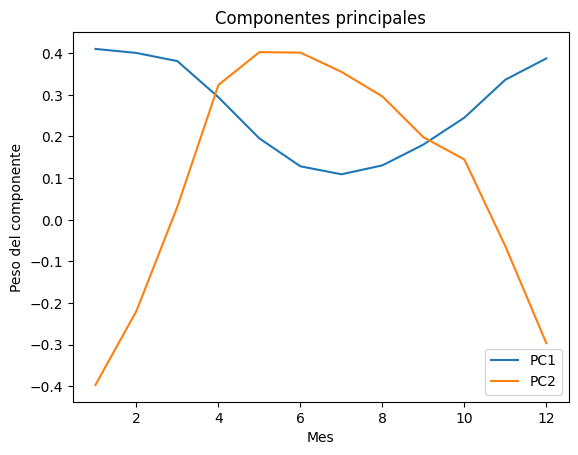

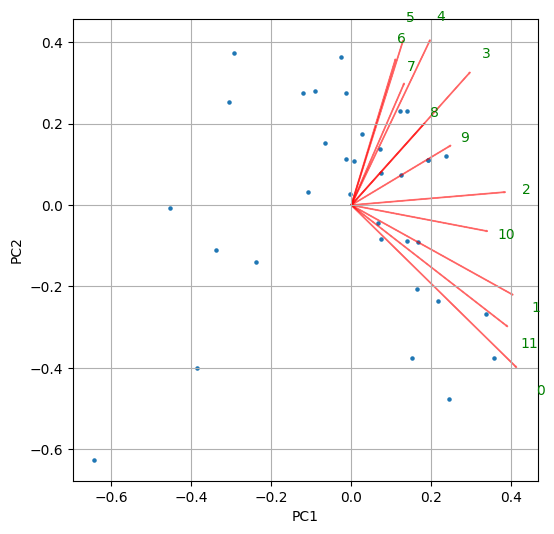

In [44]:
weather_data = pd.read_csv('data/weather.csv', sep=',', header=0)

# Normalizar los datos
X = weather_data.values[:,:12].astype(np.float32)  # la última columna es el nombre de la estación

# 3. Aplicar PCA
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X)

# p1 y p2
plt.plot(range(1, 13), pca.components_[0], label="PC1")
plt.plot(range(1, 13), pca.components_[1], label="PC2")
plt.xlabel("Mes")
plt.ylabel("Peso del componente")
plt.title("Componentes principales")
plt.legend()
plt.show()

# estaciones en el biplot
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(6,6))
mybiplot(principal_components[:,0:2], np.transpose(pca.components_[0:2, :]), list(data.columns[:-1]))
plt.show()